#Project




#Dataset

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub



# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/predict-conversion-in-digital-marketing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/predict-conversion-in-digital-marketing-dataset


In [ ]:
!ls /root/.cache/kagglehub/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/versions/1


ls: cannot access '/root/.cache/kagglehub/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/versions/1': No such file or directory


In [ ]:
import pandas as pd
import os
path_to_file = os.path.join(path, "digital_marketing_campaign_dataset.csv")
df = pd.read_csv(path_to_file)
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


## Calculations


In [ ]:
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import confint_proportions_2indep
from statsmodels.stats.proportion import proportions_ztest

df_a = df[(df['CampaignChannel'] == "Email") & (df['CampaignType'] == "Conversion")]
df_b = df[(df['CampaignChannel'] == "Social Media") & (df['CampaignType'] == "Conversion")]
df_a = df_a.drop_duplicates('CustomerID')

df_b = df_b.drop_duplicates('CustomerID')

print(f"total records in Email: {len(df_a)}")
print(f"total records in Social Media: {len(df_b)}")
common_users = pd.merge(df_a, df_b, on='CustomerID', how='inner')
print(f"common records: {len(common_users)}")


n_email  = df_a['CustomerID'].nunique()
n_social = df_b['CustomerID'].nunique()
overlap  = len(set(df_a['CustomerID']).intersection(set(df_b['CustomerID'])))
print(f"Unique users in Email and Social media capaings are [{n_email}, {n_social}] \n")


#CVR calculation

CVR_email = df_a['Conversion'].sum()/ len(df_a)
CVR_social = df_b['Conversion'].sum()/ len(df_b)
print(f"CVR EMAIL: {CVR_email},CVR social: {CVR_social}")

#Compute absolute difference
abs_diff = CVR_email - CVR_social
print(f"difference between email and social media CVR: {abs_diff} which lower that the MDE 2pp \n")


#email vs rest

df_est = df.groupby('CampaignChannel')['Conversion'].mean()
df_c = df[(df['CampaignChannel'] != "Email") & (df['CampaignType'] == "Conversion")]
print(f"total record in excluded dataset: {len(df_c)}")
df_c_unique = df_c.drop_duplicates('CustomerID')
print(f"Unique records in excluded dataset: {len(df_c_unique)}")
est_cvr = df_c_unique['Conversion'].mean()
print(f"CVR The rest {est_cvr}")
print(f"CVR difference between Email campaign and the rest is {CVR_email - est_cvr} which again is less that MDE \n")



# statistical test to capture the significancy of the results:

#a CI for a single binomial proportion

CI_email = proportion_confint(count=df_a['Conversion'].sum(), nobs=len(df_a), alpha=0.05, method='wilson')
print("Email CI:", CI_email)

CI_social = proportion_confint(count=df_b['Conversion'].sum(), nobs=len(df_b), alpha=0.05, method='wilson')
print("Social Media CI:", CI_social)

CI_rest= proportion_confint(count=df_c_unique['Conversion'].sum(), nobs=len(df_c_unique), alpha=0.05, method='wilson')
print("Rest CI:", CI_rest ,"\n")


# CI for the difference of two independent proportion
CI_email_vs_social = confint_proportions_2indep(count1=df_a['Conversion'].sum(), nobs1=len(df_a),
                                             count2=df_b['Conversion'].sum(), nobs2=len(df_b),
                                             method='score')
print("Email vs Social Media CI:", CI_email_vs_social)

CI_email_vs_rest = confint_proportions_2indep(count1=df_a['Conversion'].sum(), nobs1=len(df_a),
                                             count2=df_c_unique['Conversion'].sum(), nobs2=len(df_c_unique),
                                             method='score')
print("Email vs Rest CI:", CI_email_vs_rest,'\n')


# two-proportion z-test (pooled SE)

z_test_email_vs_social, p_value_email_vs_social = proportions_ztest(count=[df_a['Conversion'].sum(), df_b['Conversion'].sum()],
                                                                  nobs=[len(df_a), len(df_b)])
print(f"p-value for Email vs Social Media: {p_value_email_vs_social}")
print(f"z-test for Email vs Social Media: {z_test_email_vs_social} \n")


z_test_email_vs_rest, p_value_email_vs_rest = proportions_ztest(count=[df_a['Conversion'].sum(), df_c_unique['Conversion'].sum()],
                                                                  nobs=[len(df_a), len(df_c_unique)])
print(f"p-value for Email vs Rest: {p_value_email_vs_rest}")
print(f"z-test for Email vs Rest: {z_test_email_vs_rest} \n")



total records in Email: 416
total records in Social Media: 367
common records: 0
Unique users in Email and Social media capaings are [416, 367] 

CVR EMAIL: 0.9326923076923077,CVR social: 0.9237057220708447
difference between email and social media CVR: 0.008986585621463039 which lower that the MDE 2pp 

total record in excluded dataset: 1661
Unique records in excluded dataset: 1661
CVR The rest 0.9337748344370861
CVR difference between Email campaign and the rest is -0.0010825267447783782 which again is less that MDE 

Email CI: (0.9044418403426463, 0.9530246924081099)
Social Media CI: (0.891943642626515, 0.9466896671145404)
Rest CI: (0.9207868593314676, 0.9447610235406623) 

Email vs Social Media CI: (-0.027574110820582743, 0.04706550820038696)
Email vs Rest CI: (-0.03142528049353077, 0.023304393618829213) 

p-value for Email vs Social Media: 0.6262860521371373
z-test for Email vs Social Media: 0.48696088275480415 

p-value for Email vs Rest: 0.9368104547089898
z-test for Email vs Re

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import zt_ind_solve_power

# Inputs from your data
p1 = CVR_email          # Conversion rate for the test group (e.g., Email)
p2 = est_cvr            # Conversion rate for the control group (e.g., Rest)
alpha = 0.05            # Significance level (Type I error rate)
power = 0.80            # Desired statistical power (1 - Type II error rate)

# Minimum detectable effect (absolute difference in proportions)
mde = 0.02  # Example: 2 percentage points difference = 0.02

# ✅ Calculate the pooled standard deviation for two proportions
pooled_std = np.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / 2)

# ✅ Calculate effect size using pooled standard deviation (Cohen's h)
effect_size = abs(mde) / pooled_std

# ✅ Estimate the required sample size per group for detecting MDE with given power
n_required = zt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

print(f"📏 Minimum sample size per group to detect {mde*100:.1f}pp difference at 80% power: {np.ceil(n_required):.0f}")



📏 Minimum sample size per group to detect 2.0pp difference at 80% power: 2446


## plots

The absolute difference between Email and other campaign channels is not business-significant and does not exceed 0.02.


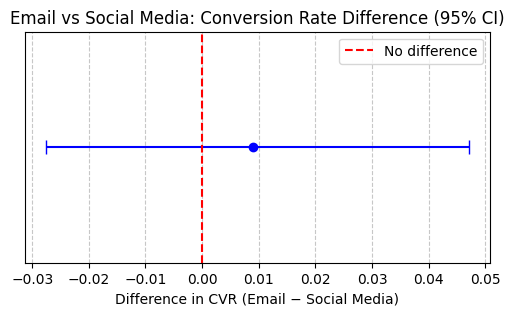

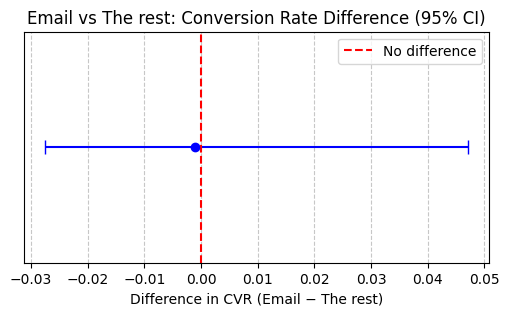

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import confint_proportions_2indep

# plotting the difference in CVR for email and social media

nobs_a = len(df_a)
nobs_b = len(df_b)

success_a = df_a['Conversion'].sum()
success_b = df_b['Conversion'].sum()


# Point estimate: difference in conversion rates
p_email = success_a / nobs_a
p_referral = success_b / nobs_b
point_estimate = p_email - p_referral

# Confidence interval for difference
ci_low, ci_high = CI_email_vs_social

# Plot
plt.figure(figsize=(6,3))
plt.errorbar(x=point_estimate, y=0,
             xerr=[[point_estimate - ci_low], [ci_high - point_estimate]],
             fmt='o', color='blue', capsize=5)

plt.axvline(0, color='red', linestyle='--', label="No difference")

plt.title("Email vs Social Media: Conversion Rate Difference (95% CI)")
plt.xlabel("Difference in CVR (Email − Social Media)")
plt.yticks([])
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



# plotting the difference in CVR for email and the rest


nobs_a = len(df_a)
nobs_b = len(df_c_unique)

success_a = df_a['Conversion'].sum()
success_b = df_c_unique['Conversion'].sum()


# Point estimate: difference in conversion rates
p_email = success_a / nobs_a
p_referral = success_b / nobs_b
point_estimate = p_email - p_referral

# Confidence interval for difference
ci_low, ci_high = CI_email_vs_social

# Plot
plt.figure(figsize=(6,3))
plt.errorbar(x=point_estimate, y=0,
             xerr=[[point_estimate - ci_low], [ci_high - point_estimate]],
             fmt='o', color='blue', capsize=5)

plt.axvline(0, color='red', linestyle='--', label="No difference")

plt.title("Email vs The rest: Conversion Rate Difference (95% CI)")
plt.xlabel("Difference in CVR (Email − The rest)")
plt.yticks([])
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


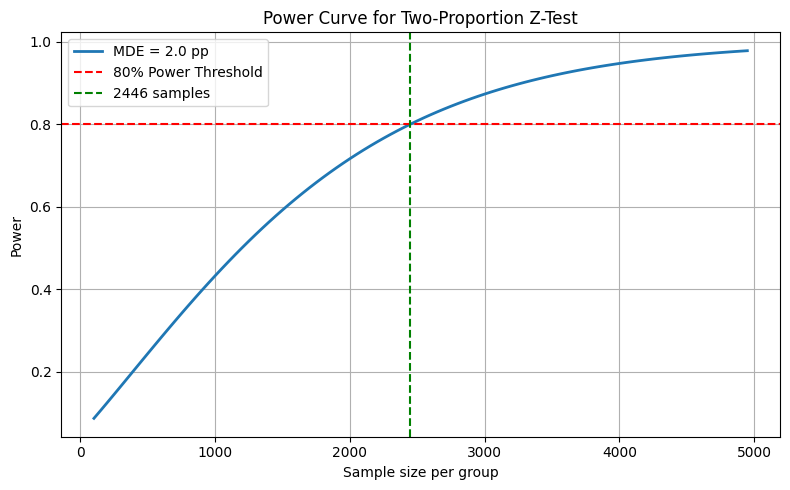

In [ ]:



# Power curve
sample_sizes = np.arange(100, 5000, 50)
powers = [zt_ind_solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='two-sided') for n in sample_sizes]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, powers, label=f'MDE = {mde*100:.1f} pp', lw=2)
plt.axhline(0.8, color='red', linestyle='--', label='80% Power Threshold')
plt.axvline(n_required, color='green', linestyle='--', label=f'{np.ceil(n_required):.0f} samples')
plt.xlabel('Sample size per group')
plt.ylabel('Power')
plt.title('Power Curve for Two-Proportion Z-Test')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Report


* The analysis indicates that the Email campaign does not show a statistically significant difference in conversion rate (CVR) compared to Social Media or other campaign channels. The observed difference in CVR is neither statistically significant nor meaningful from a business perspective, as it does not exceed the predefined Minimum Detectable Effect (MDE).

* The power sensitivity analysis suggests that the results are inconclusive due to an insufficient sample size. To confidently detect the expected effect size, we would need a minimum of 2,427 samples, meaning the current analysis is underpowered for reliable inference.


Recommendation: Do not shift budget to Email based on this analysis.
The conversion rate is not significantly different, and current data is underpowered to detect the business-relevant uplift of 2 percentage points.
Action: Re-run this test with at least 2,427 Email + 2,427 Social Media users to draw confident conclusions.

# Uplift analysis

For each customer segment (e.g., Age group, Gender, Income level, LoyaltyPoints tier):


Does the treatment effect (e.g., Email campaign vs PPC campaign) vary?


Which customer segments actually respond better to ads (positive uplift) vs those who might convert anyway (no uplift)?


Can you build an uplift model that predicts incremental conversion probability (not just absolute conversion)?

## Calculations

In [ ]:
df['CampaignChannel'].unique()

array(['Social Media', 'Email', 'PPC', 'Referral', 'SEO'], dtype=object)

In [ ]:
df_email = df_a.drop_duplicates('CustomerID')
df_ppc = df[(df['CampaignType']== 'Conversion') & (df['CampaignChannel']== 'PPC')]
df_ppc = df_ppc.drop_duplicates('CustomerID')

print(f"total records in Email: {len(df_email)}")
print(f"total records in PPC: {len(df_ppc)}")

df_email = df_email[['CustomerID','CampaignChannel','CampaignType','Conversion', 'Age','Gender','Income','LoyaltyPoints', 'PreviousPurchases']]
df_ppc = df_ppc[['CustomerID','CampaignChannel','CampaignType','Conversion','Age','Gender','Income','LoyaltyPoints', 'PreviousPurchases']]

df_all = pd.concat([df_email, df_ppc], axis=0)


total records in Email: 416
total records in PPC: 447


### Gender

In [ ]:
# -----------------------------------------------------------
# 👤 Gender Segment Overlap + Sample Ratio Mismatch (SRM) Check
# -----------------------------------------------------------

# Step 1: Count number of users by Gender and Campaign Channel
gender_counts = df_all.groupby(['Gender', 'CampaignChannel']).size().unstack(fill_value=0)
print("📊 User Count by Gender and Campaign Channel:\n", gender_counts, "\n")

# Step 2: Filter genders that are present in both Email and PPC groups
valid_genders = gender_counts[(gender_counts['Email'] > 0) & (gender_counts['PPC'] > 0)].reset_index()
print("✅ Valid Genders with Both Channels:\n", valid_genders, "\n")

# Step 3: Keep only records that belong to those valid gender groups
df_gender_overlap = df_all.merge(valid_genders[['Gender']], on='Gender', how='inner')
print("🔄 Filtered DataFrame with Gender Overlap:\n", df_gender_overlap[['Gender', 'CampaignChannel']].head(), "\n")


# -----------------------------------------------------------
# 🧪 SRM Check (Sample Ratio Mismatch using Chi-Square Goodness of Fit)
# -----------------------------------------------------------

from scipy.stats import chisquare

def srm_check(df, segment_col):
    srm_results = []

    for gender, group in df.groupby(segment_col):
        count_email = (group['CampaignChannel'] == 'Email').sum()
        count_ppc = (group['CampaignChannel'] == 'PPC').sum()
        total = count_email + count_ppc

        expected = [total / 2, total / 2]
        observed = [count_email, count_ppc]
        # H0: The observed frequencies match the expected frequencies.
        chi2, p = chisquare(f_obs=observed, f_exp=expected)

        srm_results.append({
            segment_col: gender,
            'Email': count_email,
            'PPC': count_ppc,
            'p-value': p,
            'SRM Detected': p < 0.05
        })

    return pd.DataFrame(srm_results)

srm_results = srm_check(df_gender_overlap, 'Gender')
print("🧮 SRM Check Results by Gender:\n", srm_results, "\n")


# -----------------------------------------------------------
# 📈 Conversion Rate Analysis by Gender and Channel
# -----------------------------------------------------------

# Conversion Rate for Email group
Cvr_f_e = df_email.groupby('Gender')['Conversion'].mean()
print("📩 Email CVR by Gender:\n", Cvr_f_e, "\n")

# Conversion Rate for PPC group
Cvr_f_p = df_ppc.groupby('Gender')['Conversion'].mean()
print("💰 PPC CVR by Gender:\n", Cvr_f_p, "\n")

# Uplift = Email CVR - PPC CVR
uplift_f = Cvr_f_e - Cvr_f_p
print("📈 Uplift (Email - PPC) by Gender:\n", uplift_f, "\n")


# -----------------------------------------------------------
# 🧪 Z-Test for Proportions (Binary Conversion Comparison)
# -----------------------------------------------------------

from statsmodels.stats.proportion import proportions_ztest

# 🔹 Female
successes = [
    df_email[df_email['Gender'] == 'Female']['Conversion'].sum(),
    df_ppc[df_ppc['Gender'] == 'Female']['Conversion'].sum()
]
nobs = [
    df_email[df_email['Gender'] == 'Female'].shape[0],
    df_ppc[df_ppc['Gender'] == 'Female'].shape[0]
]
stat, pval = proportions_ztest(successes, nobs)
print(f"📊 Z-Test (Female): z = {stat:.4f}, p = {pval:.4f}")
if pval < 0.05:
    print("🔴 Significant difference in conversion rates for Female.\n")
else:
    print("🟢 No significant difference for Female.\n")

# 🔹 Male
successes = [
    df_email[df_email['Gender'] == 'Male']['Conversion'].sum(),
    df_ppc[df_ppc['Gender'] == 'Male']['Conversion'].sum()
]
nobs = [
    df_email[df_email['Gender'] == 'Male'].shape[0],
    df_ppc[df_ppc['Gender'] == 'Male'].shape[0]
]
stat, pval = proportions_ztest(successes, nobs)
print(f"📊 Z-Test (Male): z = {stat:.4f}, p = {pval:.4f}")
if pval < 0.05:
    print("🔴 Significant difference in conversion rates for Male.\n")
else:
    print("🟢 No significant difference for Male.\n")


# -----------------------------------------------------------
# 📘 Chi-Square Test: Is Gender Associated with Conversion?
# (Using Email group only as an example)
# -----------------------------------------------------------

from scipy.stats import chi2_contingency

# Step 1: Contingency table of Gender vs Conversion
contingency = pd.crosstab(df_email['Gender'], df_email['Conversion'])
print("📋 Contingency Table (Email Only):\n", contingency, "\n")

# Step 2: Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"📊 Chi-square statistic = {chi2:.4f}")
print(f"📉 p-value = {p:.4f}")
print(f"📐 Degrees of freedom = {dof}")
print("📋 Expected Frequencies:\n", pd.DataFrame(expected, index=contingency.index, columns=contingency.columns), "\n")

# Step 3: Interpretation
if p < 0.05:
    print("❗ Gender and Conversion are significantly associated (reject H0).\n")
else:
    print("✅ No significant association between Gender and Conversion (fail to reject H0).\n")


📊 User Count by Gender and Campaign Channel:
 CampaignChannel  Email  PPC
Gender                     
Female             262  279
Male               154  168 

✅ Valid Genders with Both Channels:
 CampaignChannel  Gender  Email  PPC
0                Female    262  279
1                  Male    154  168 

🔄 Filtered DataFrame with Gender Overlap:
    Gender CampaignChannel
0    Male           Email
1    Male           Email
2  Female           Email
3  Female           Email
4    Male           Email 

🧮 SRM Check Results by Gender:
    Gender  Email  PPC   p-value  SRM Detected
0  Female    262  279  0.464848         False
1    Male    154  168  0.435279         False 

📩 Email CVR by Gender:
 Gender
Female    0.938931
Male      0.922078
Name: Conversion, dtype: float64 

💰 PPC CVR by Gender:
 Gender
Female    0.949821
Male      0.922619
Name: Conversion, dtype: float64 

📈 Uplift (Email - PPC) by Gender:
 Gender
Female   -0.010889
Male     -0.000541
Name: Conversion, dtype: float64 


### Age

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, norm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import NormalIndPower

# STEP 1: Count users per age and campaign channel


age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_all['AgeBin'] = pd.cut(df_all['Age'], bins=age_bins, labels=age_labels, right=False)




age_counts = df_all.groupby(['AgeBin', 'CampaignChannel']).size().unstack(fill_value=0)
print("📊 User Count by Age and Campaign Channel:\n", age_counts.head(), "\n")

# STEP 2: Filter out ages not present in both channels
if (age_counts['Email'] == 0).any() or (age_counts['PPC'] == 0).any():
    print("⚠️ Some age groups do not appear in both channels. Filtering them out...\n")
    valid_ages = age_counts[(age_counts['Email'] > 0) & (age_counts['PPC'] > 0)].reset_index()
    df_all = df_all[df_all['AgeBin'].isin(valid_ages['AgeBin'])].copy()
else:
    print("✅ All age groups have both Email and PPC campaigns — no filtering needed.\n")

# # STEP 3: SRM (Sample Ratio Mismatch) check
srm_age = srm_check(df_all, 'AgeBin')
print("🧮 SRM Check Results by Age (Only those with mismatch):\n", srm_age[srm_age["SRM Detected"]], "\n")

# # STEP 4: Manually filter out SRM-affected age groups (if any)
# excluded_ages = [19, 55, 57, 60]
# df_email_age = df_email[~df_email['Age'].isin(excluded_ages)]
# df_ppc_age = df_ppc[~df_ppc['Age'].isin(excluded_ages)]
# print(f"🔍 Excluded ages due to SRM or low counts: {excluded_ages}\n")

# # STEP 5: Define age bins
df_email_age = df_email
df_ppc_age = df_ppc

# STEP 6: Analyze conversion rate differences by age bin
results = []

for bin_label in age_labels:
    bin_df = df_all[df_all['AgeBin'] == bin_label]

    email_df = bin_df[bin_df['CampaignChannel'] == 'Email']
    ppc_df = bin_df[bin_df['CampaignChannel'] == 'PPC']

    email_total = len(email_df)
    ppc_total = len(ppc_df)
    email_conv = email_df['Conversion'].sum()
    ppc_conv = ppc_df['Conversion'].sum()

    if email_total == 0 or ppc_total == 0:
        continue

    # 🔹 Chi-square test
    contingency = [[email_conv, email_total - email_conv],
                   [ppc_conv, ppc_total - ppc_conv]]
    chi2, chi_p, _, _ = chi2_contingency(contingency)

    # 🔹 Z-test for proportion difference
    count = np.array([email_conv, ppc_conv])
    nobs = np.array([email_total, ppc_total])
    z_stat, z_p = proportions_ztest(count, nobs)

    results.append({
        'Age Bin': bin_label,
        'Email Users': email_total,
        'PPC Users': ppc_total,
        'Email CVR': round(email_conv / email_total, 4),
        'PPC CVR': round(ppc_conv / ppc_total, 4),
        'Z p-value': round(z_p, 4),
        'Chi p-value': round(chi_p, 4),
        'Significant Difference': z_p < 0.05 or chi_p < 0.05
    })

# STEP 7: Compile results into a DataFrame
df_results = pd.DataFrame(results)
df_results['CVR_Diff'] = (df_results['Email CVR'] - df_results['PPC CVR']).abs()
display(df_results)

# STEP 8: Identify the age bin with the most difference
most_diff_bin_age = df_results.sort_values('CVR_Diff', ascending=False).iloc[0]
print("\n🔍 Age Bin with Most Absolute CVR Difference:")
print(most_diff_bin_age)

# STEP 9: Power analysis for detecting a 2% absolute difference in the most different bin
email_cvr = most_diff_bin_age['Email CVR']
ppc_cvr = most_diff_bin_age['PPC CVR']

# Calculate pooled std deviation for proportions
pooled_var = (email_cvr * (1 - email_cvr) + ppc_cvr * (1 - ppc_cvr)) / 2
effect_size = 0.02 / np.sqrt(pooled_var)

# Total sample size in that bin
total_users = most_diff_bin_age['Email Users'] + most_diff_bin_age['PPC Users']

power = NormalIndPower().power(effect_size=effect_size, nobs1=total_users, alpha=0.05, ratio=1)
print(f"\n📉 Power to detect 2% difference in bin {most_diff_bin_age['Age Bin']}: {power:.2f}")
print(f"👉 You only have a {power:.2f} chance of detecting a true 2% difference between Email and PPC conversion rates given your current sample size in that age bin.")


📊 User Count by Age and Campaign Channel:
 CampaignChannel  Email  PPC
AgeBin                     
18-24               56   63
25-34               99   79
35-44               79   90
45-54               69   83
55-64               72   92 

✅ All age groups have both Email and PPC campaigns — no filtering needed.

🧮 SRM Check Results by Age (Only those with mismatch):
 Empty DataFrame
Columns: [AgeBin, Email, PPC, p-value, SRM Detected]
Index: [] 



/tmp/ipython-input-280580424.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df_all.groupby(['AgeBin', 'CampaignChannel']).size().unstack(fill_value=0)
/tmp/ipython-input-1999186250.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for gender, group in df.groupby(segment_col):


,Age Bin,Email Users,PPC Users,Email CVR,PPC CVR,Z p-value,Chi p-value,Significant Difference,CVR_Diff
0,18-24,56,63,0.9464,0.9524,0.8822,1.0000,False,0.0060
1,25-34,99,79,0.9596,0.9620,0.9340,1.0000,False,0.0024
2,35-44,79,90,0.9114,0.9556,0.2456,0.3960,False,0.0442
3,45-54,69,83,0.9130,0.8916,0.6585,0.8659,False,0.0214
4,55-64,72,92,0.9444,0.9457,0.9731,1.0000,False,0.0013
5,65+,41,40,0.9024,0.9250,0.7179,1.0000,False,0.0226



🔍 Age Bin with Most Absolute CVR Difference:
Age Bin                    35-44
Email Users                   79
PPC Users                     90
Email CVR                 0.9114
PPC CVR                   0.9556
Z p-value                 0.2456
Chi p-value                0.396
Significant Difference     False
CVR_Diff                  0.0442
Name: 2, dtype: object

📉 Power to detect 2% difference in bin 35-44: 0.11
👉 You only have a 0.11 chance of detecting a true 2% difference between Email and PPC conversion rates given your current sample size in that age bin.


#### Plots

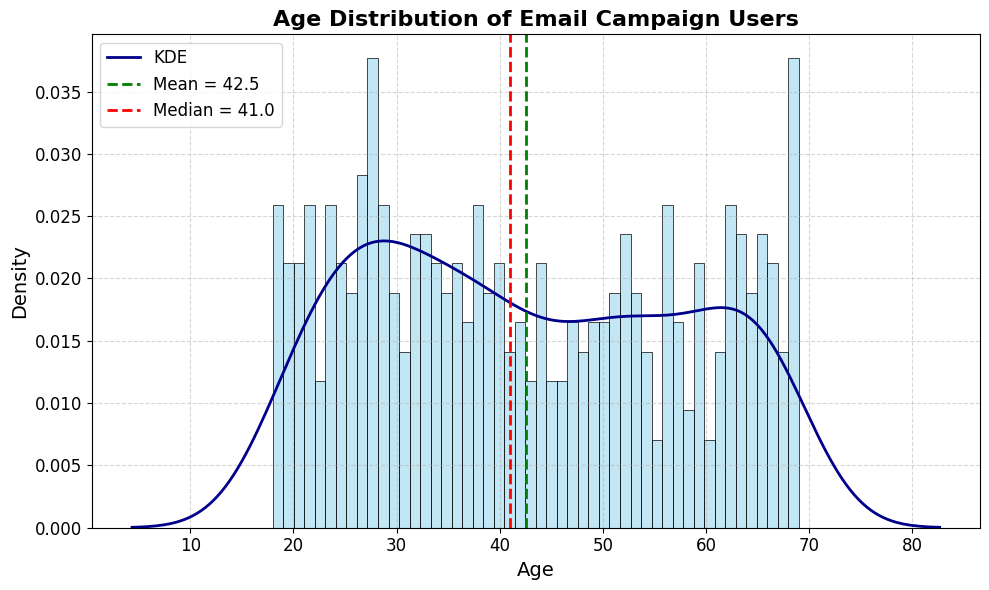

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(
    df_email_age['Age'],
    bins=50,
    kde=True,
    stat="density",
    color="skyblue",
    edgecolor="black",
    linewidth=0.5,
)

# Optional: Add KDE shading for a smooth visual
sns.kdeplot(
    df_email_age['Age'],
    color="darkblue",
    lw=2,
    label="KDE"
)

# Add mean and median lines
mean_age = df_email_age['Age'].mean()
median_age = df_email_age['Age'].median()

plt.axvline(mean_age, color='green', linestyle='--', lw=2, label=f'Mean = {mean_age:.1f}')
plt.axvline(median_age, color='red', linestyle='--', lw=2, label=f'Median = {median_age:.1f}')

# Title & labels
plt.title("Age Distribution of Email Campaign Users", fontsize=16, weight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Formatting
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


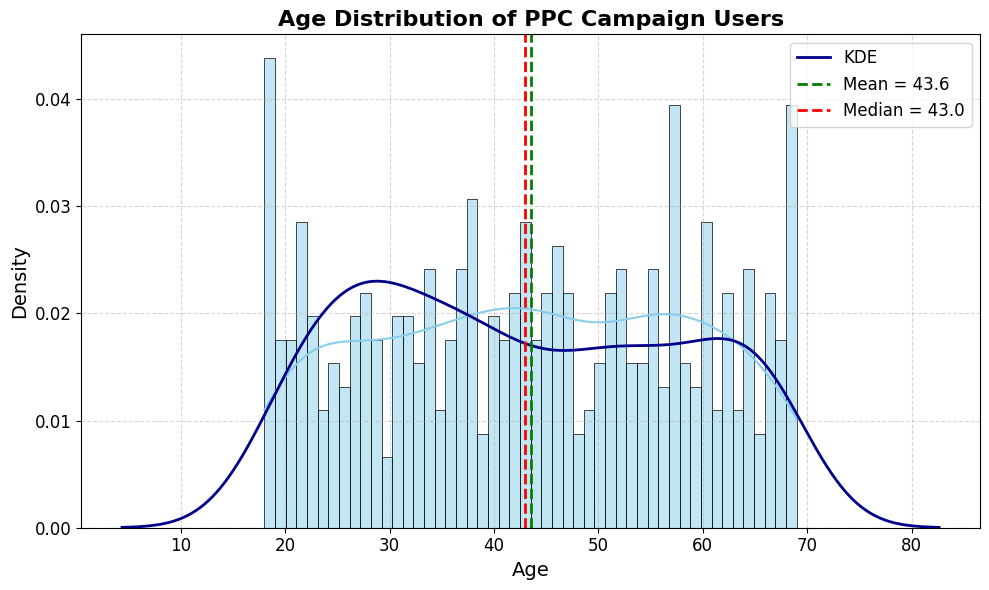

In [ ]:


plt.figure(figsize=(10, 6))
sns.histplot(
    df_ppc_age['Age'],
    bins=50,
    kde=True,
    stat="density",
    color="skyblue",
    edgecolor="black",
    linewidth=0.5,
)

# Optional: Add KDE shading for a smooth visual
sns.kdeplot(
    df_email_age['Age'],
    color="darkblue",
    lw=2,
    label="KDE"
)

# Add mean and median lines
mean_age = df_ppc_age['Age'].mean()
median_age = df_ppc_age['Age'].median()

plt.axvline(mean_age, color='green', linestyle='--', lw=2, label=f'Mean = {mean_age:.1f}')
plt.axvline(median_age, color='red', linestyle='--', lw=2, label=f'Median = {median_age:.1f}')

# Title & labels
plt.title("Age Distribution of PPC Campaign Users", fontsize=16, weight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Formatting
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


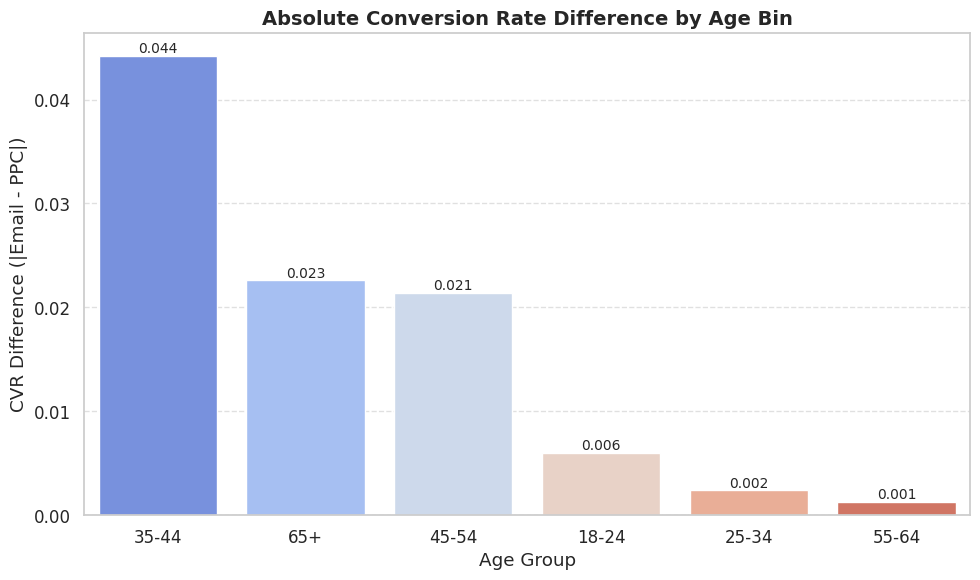

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional Seaborn theme
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Sort by CVR difference for clarity
df_results_sorted = df_results.sort_values('CVR_Diff', ascending=False)

# Barplot with clear coloring and labels
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_results_sorted,
    x='Age Bin',
    y='CVR_Diff',
    hue='Age Bin',  # Resolves the warning
    dodge=False,     # Ensures no bar shifting
    legend=False,    # Optional: remove redundant hue legend
    palette='coolwarm'
)

# Add value labels above bars
for p in barplot.patches:
    barplot.annotate(f"{p.get_height():.3f}",
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Absolute Conversion Rate Difference by Age Bin', fontsize=14, weight='bold')
plt.xlabel('Age Group')
plt.ylabel('CVR Difference (|Email - PPC|)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


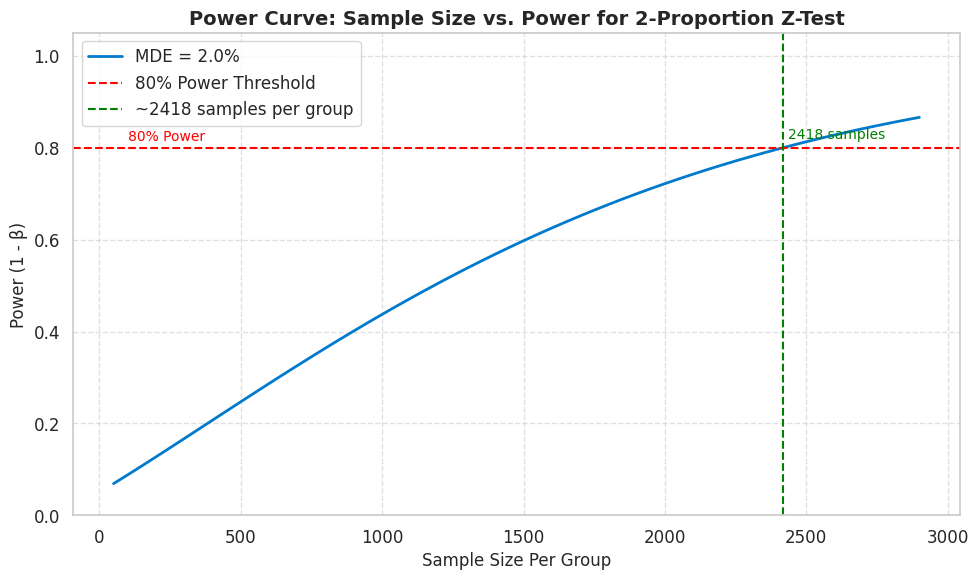

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import zt_ind_solve_power

# Step 1: Inputs
p1 = most_diff_bin_age['Email CVR']
p2 = most_diff_bin_age['PPC CVR']
mde = 0.02
alpha = 0.05
power_target = 0.80

# Step 2: Effect size calculation
pooled_std = np.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / 2)
effect_size = mde / pooled_std

# Step 3: Compute power curve
sample_sizes = np.arange(50, int(np.ceil(n_required)) + 500, 50)
powers = [zt_ind_solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='two-sided')
          for n in sample_sizes]

# Step 4: Find minimum sample size for 80% power
n_required = zt_ind_solve_power(effect_size=effect_size, power=power_target,
                                alpha=alpha, alternative='two-sided')

# Step 5: Plotting (Polished)
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers, lw=2, label=f'MDE = {mde*100:.1f}%', color='#007ACC')
plt.axhline(power_target, color='red', linestyle='--', lw=1.5, label='80% Power Threshold')
plt.axvline(n_required, color='green', linestyle='--', lw=1.5, label=f'~{np.ceil(n_required):.0f} samples per group')

# Add annotations
plt.text(n_required + 20, 0.82, f'{np.ceil(n_required):.0f} samples', color='green', fontsize=10)
plt.text(100, power_target + 0.015, '80% Power', color='red', fontsize=10)

# Final touches
plt.title('Power Curve: Sample Size vs. Power for 2-Proportion Z-Test', fontsize=14, weight='bold')
plt.xlabel('Sample Size Per Group', fontsize=12)
plt.ylabel('Power (1 - β)', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Income

In [ ]:
len(df[(df['CampaignChannel'] == "PPC") & (df['CampaignType'] == 'Conversion')] ), len(df_ppc)


(447, 447)

In [ ]:
df_ppc.Income.describe()

,Income
count,447.000000
mean,85575.519016
std,37573.171081
min,20218.000000
25%,53241.500000
50%,87557.000000
75%,117349.500000
max,149974.000000


In [ ]:
df_email.Income.describe()

,Income
count,416.000000
mean,82950.673077
std,37344.124074
min,20620.000000
25%,49472.000000
50%,80783.000000
75%,115082.750000
max,149483.000000


In [ ]:


# Step 1: Define income bins
income_bins = [20000, 50000, 82000, 110000, 150000]
income_labels = ['20k–50k', '50k–82k', '82k–110k', '110k+']
df_all['IncomeBin'] = pd.cut(df_all['Income'], bins=income_bins, labels=income_labels, right=False)

# Step 2: Count by income and channel
income_counts = df_all.groupby(['IncomeBin', 'CampaignChannel']).size().unstack(fill_value=0)
print("User Count by Income and Campaign Channel:\n", income_counts.head(), "\n")

# Step 3: Filter bins that don't appear in both channels
if (income_counts['Email'] == 0).any() or (income_counts['PPC'] == 0).any():
    print("Some income groups do not appear in both channels. Filtering them out...\n")
    valid_incomes = income_counts[(income_counts['Email'] > 0) & (income_counts['PPC'] > 0)].reset_index()
    df_all = df_all[df_all['IncomeBin'].isin(valid_incomes['IncomeBin'])].copy()
else:
    print("All income groups have both Email and PPC campaigns — no filtering needed.\n")

# Step 4: SRM Check
srm_income = srm_check(df_all, 'IncomeBin')
print("🧮 SRM Check Results by Income (Only those with mismatch):\n", srm_income[srm_income["SRM Detected"]], "\n")

# Step 5: CVR analysis
results = []

for bin_label in income_labels:
    bin_df = df_all[df_all['IncomeBin'] == bin_label]

    email_df = bin_df[bin_df['CampaignChannel'] == 'Email']
    ppc_df = bin_df[bin_df['CampaignChannel'] == 'PPC']

    email_total = len(email_df)
    ppc_total = len(ppc_df)
    email_conv = email_df['Conversion'].sum()
    ppc_conv = ppc_df['Conversion'].sum()

    if email_total == 0 or ppc_total == 0:
        continue

    # Chi-square test
    contingency = [[email_conv, email_total - email_conv],
                   [ppc_conv, ppc_total - ppc_conv]]
    chi2, chi_p, _, _ = chi2_contingency(contingency)

    # Z-test
    count = np.array([email_conv, ppc_conv])
    nobs = np.array([email_total, ppc_total])
    z_stat, z_p = proportions_ztest(count, nobs)

    results.append({
        'Income Bin': bin_label,
        'Email Users': email_total,
        'PPC Users': ppc_total,
        'Email CVR': round(email_conv / email_total, 4),
        'PPC CVR': round(ppc_conv / ppc_total, 4),
        'Z p-value': round(z_p, 4),
        'Chi p-value': round(chi_p, 4),
        'Significant Difference': z_p < 0.05 or chi_p < 0.05
    })

# Step 6: Compile results
df_results = pd.DataFrame(results)
df_results['CVR_Diff'] = (df_results['Email CVR'] - df_results['PPC CVR']).abs()
display(df_results)

# Step 7: Most different bin
most_diff_bin_inc= df_results.sort_values('CVR_Diff', ascending=False).iloc[0]
print("\n🔍 Income Bin with Most Absolute CVR Difference:")
print(most_diff_bin_inc)

# Step 8: Power analysis
email_cvr = most_diff_bin_inc['Email CVR']
ppc_cvr = most_diff_bin_inc['PPC CVR']
pooled_var = (email_cvr * (1 - email_cvr) + ppc_cvr * (1 - ppc_cvr)) / 2
effect_size = 0.02 / np.sqrt(pooled_var)
total_users = most_diff_bin_inc['Email Users'] + most_diff_bin_inc['PPC Users']

power = NormalIndPower().power(effect_size=effect_size, nobs1=total_users, alpha=0.05, ratio=1)
print(f"\n📉 Power to detect 2% difference in bin {most_diff_bin_inc['Income Bin']}: {power:.2f}")
print(f"👉 You only have a {power:.2f} chance of detecting a true 2% difference between Email and PPC conversion rates given your current sample size in that income bin.")


User Count by Income and Campaign Channel:
 CampaignChannel  Email  PPC
IncomeBin                  
20k–50k            105  106
50k–82k            107   99
82k–110k            84  106
110k+              120  136 

All income groups have both Email and PPC campaigns — no filtering needed.

🧮 SRM Check Results by Income (Only those with mismatch):
 Empty DataFrame
Columns: [IncomeBin, Email, PPC, p-value, SRM Detected]
Index: [] 



/tmp/ipython-input-2183202458.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_counts = df_all.groupby(['IncomeBin', 'CampaignChannel']).size().unstack(fill_value=0)
/tmp/ipython-input-1999186250.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for gender, group in df.groupby(segment_col):


,Income Bin,Email Users,PPC Users,Email CVR,PPC CVR,Z p-value,Chi p-value,Significant Difference,CVR_Diff
0,20k–50k,105,106,0.9333,0.9623,0.3445,0.5251,False,0.0290
1,50k–82k,107,99,0.9346,0.9192,0.6711,0.8758,False,0.0154
2,82k–110k,84,106,0.9286,0.9245,0.9156,1.0000,False,0.0041
3,110k+,120,136,0.9333,0.9485,0.6054,0.8026,False,0.0152



🔍 Income Bin with Most Absolute CVR Difference:
Income Bin                20k–50k
Email Users                   105
PPC Users                     106
Email CVR                  0.9333
PPC CVR                    0.9623
Z p-value                  0.3445
Chi p-value                0.5251
Significant Difference      False
CVR_Diff                    0.029
Name: 0, dtype: object

📉 Power to detect 2% difference in bin 20k–50k: 0.15
👉 You only have a 0.15 chance of detecting a true 2% difference between Email and PPC conversion rates given your current sample size in that income bin.


#### Plots

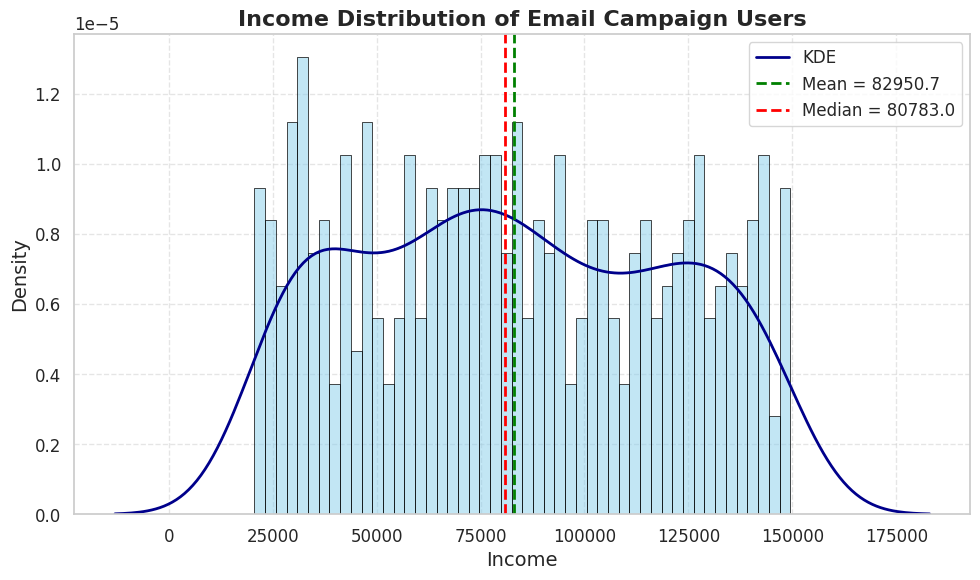

In [ ]:


plt.figure(figsize=(10, 6))
sns.histplot(
    df_email['Income'],
    bins=50,
    kde=True,
    stat="density",
    color="skyblue",
    edgecolor="black",
    linewidth=0.5,
)

# Optional: Add KDE shading for a smooth visual
sns.kdeplot(
    df_email['Income'],
    color="darkblue",
    lw=2,
    label="KDE"
)

# Add mean and median lines
mean_income = df_email['Income'].mean()
median_income = df_email['Income'].median()

plt.axvline(mean_income, color='green', linestyle='--', lw=2, label=f'Mean = {mean_income:.1f}')
plt.axvline(median_income, color='red', linestyle='--', lw=2, label=f'Median = {median_income:.1f}')

# Title & labels
plt.title("Income Distribution of Email Campaign Users", fontsize=16, weight='bold')
plt.xlabel("Income", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Formatting
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


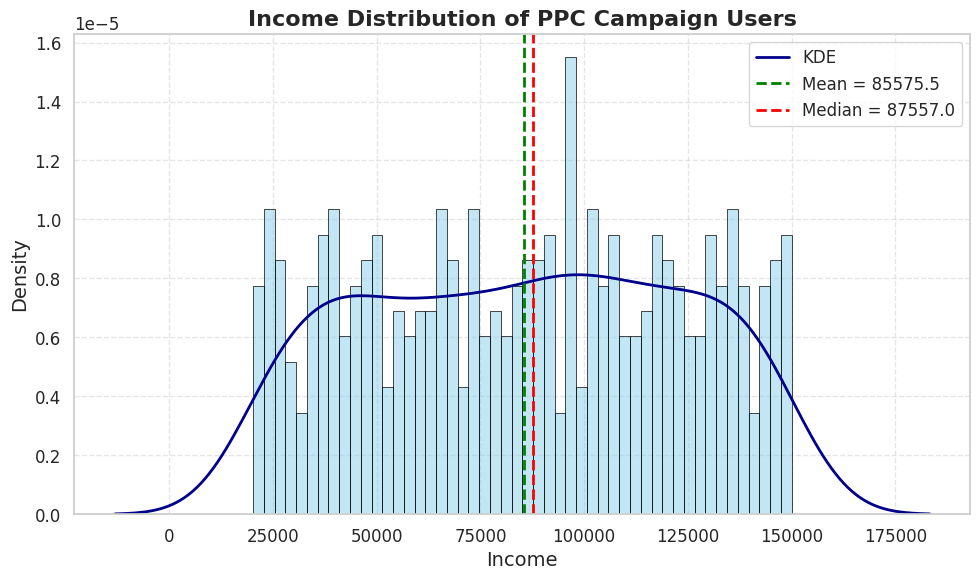

In [ ]:


plt.figure(figsize=(10, 6))
sns.histplot(
    df_ppc['Income'],
    bins=50,
    kde=True,
    stat="density",
    color="skyblue",
    edgecolor="black",
    linewidth=0.5,
)

# Optional: Add KDE shading for a smooth visual
sns.kdeplot(
    df_ppc['Income'],
    color="darkblue",
    lw=2,
    label="KDE"
)

# Add mean and median lines
mean_income = df_ppc['Income'].mean()
median_income = df_ppc['Income'].median()

plt.axvline(mean_income, color='green', linestyle='--', lw=2, label=f'Mean = {mean_income:.1f}')
plt.axvline(median_income, color='red', linestyle='--', lw=2, label=f'Median = {median_income:.1f}')

# Title & labels
plt.title("Income Distribution of PPC Campaign Users", fontsize=16, weight='bold')
plt.xlabel("Income", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Formatting
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


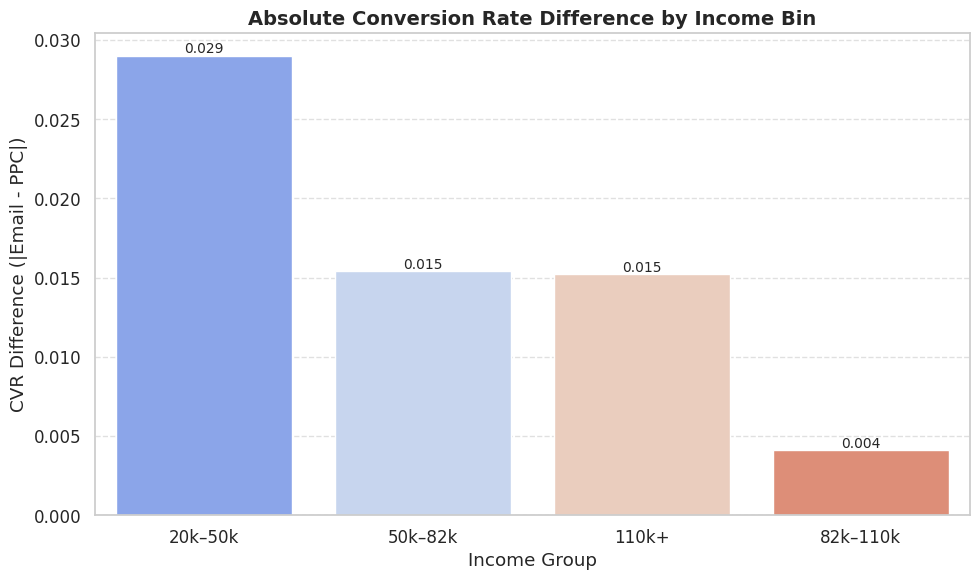

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional Seaborn theme
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Sort by CVR difference for clarity
df_results_sorted = df_results.sort_values('CVR_Diff', ascending=False)

# Barplot with clear coloring and labels
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_results_sorted,
    x='Income Bin',
    y='CVR_Diff',
    hue='Income Bin',  # Resolves the warning
    dodge=False,     # Ensures no bar shifting
    legend=False,    # Optional: remove redundant hue legend
    palette='coolwarm'
)

# Add value labels above bars
for p in barplot.patches:
    barplot.annotate(f"{p.get_height():.3f}",
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Absolute Conversion Rate Difference by Income Bin', fontsize=14, weight='bold')
plt.xlabel('Income Group')
plt.ylabel('CVR Difference (|Email - PPC|)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


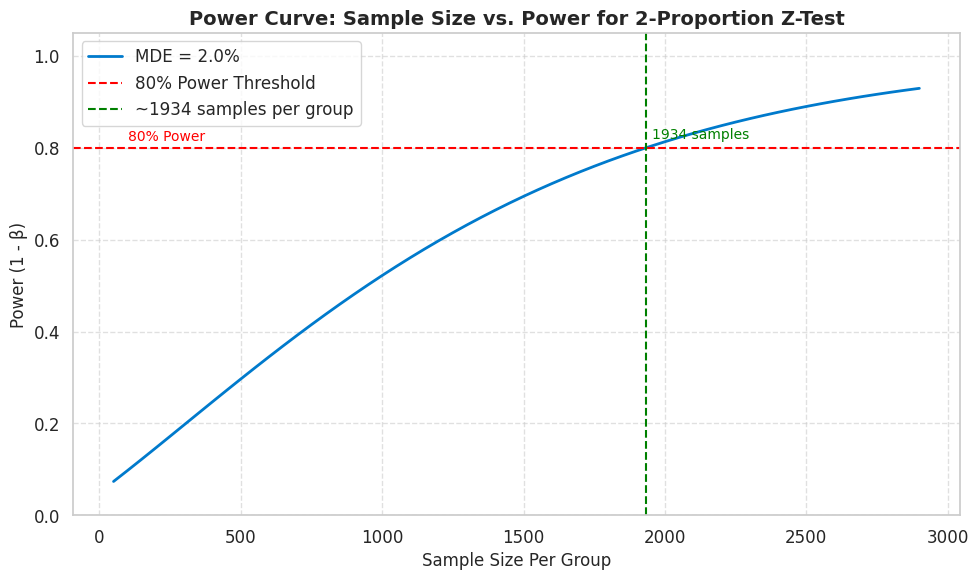

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import zt_ind_solve_power

# Step 1: Inputs
p1 = most_diff_bin_inc['Email CVR']
p2 = most_diff_bin_inc['PPC CVR']
mde = 0.02
alpha = 0.05
power_target = 0.80

# Step 2: Effect size calculation
pooled_std = np.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / 2)
effect_size = mde / pooled_std

# Step 3: Compute power curve
sample_sizes = np.arange(50, int(np.ceil(n_required)) + 500, 50)
powers = [zt_ind_solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='two-sided')
          for n in sample_sizes]

# Step 4: Find minimum sample size for 80% power
n_required = zt_ind_solve_power(effect_size=effect_size, power=power_target,
                                alpha=alpha, alternative='two-sided')

# Step 5: Plotting (Polished)
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers, lw=2, label=f'MDE = {mde*100:.1f}%', color='#007ACC')
plt.axhline(power_target, color='red', linestyle='--', lw=1.5, label='80% Power Threshold')
plt.axvline(n_required, color='green', linestyle='--', lw=1.5, label=f'~{np.ceil(n_required):.0f} samples per group')

# Add annotations
plt.text(n_required + 20, 0.82, f'{np.ceil(n_required):.0f} samples', color='green', fontsize=10)
plt.text(100, power_target + 0.015, '80% Power', color='red', fontsize=10)

# Final touches
plt.title('Power Curve: Sample Size vs. Power for 2-Proportion Z-Test', fontsize=14, weight='bold')
plt.xlabel('Sample Size Per Group', fontsize=12)
plt.ylabel('Power (1 - β)', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.stats.proportion import confint_proportions_2indep

# Filter to 20k–50k bin
bin_label = '20k–50k'
bin_df = df_all[df_all['IncomeBin'] == bin_label]

email_df = bin_df[bin_df['CampaignChannel'] == 'Email']
ppc_df = bin_df[bin_df['CampaignChannel'] == 'PPC']

# Counts
email_conv = email_df['Conversion'].sum()
ppc_conv = ppc_df['Conversion'].sum()
email_total = len(email_df)
ppc_total = len(ppc_df)

# CI for difference in proportions (email - ppc)
ci_low, ci_upp = confint_proportions_2indep(
    count1=email_conv,
    nobs1=email_total,
    count2=ppc_conv,
    nobs2=ppc_total,
    method='wald',  # You can also try 'score' or 'agresti-caffo'
    alpha=0.05
)

print(f"📊 95% CI for CVR Diff (Email - PPC) in 20k–50k group: [{ci_low:.4f}, {ci_upp:.4f}]")


📊 95% CI for CVR Diff (Email - PPC) in 20k–50k group: [-0.0889, 0.0310]


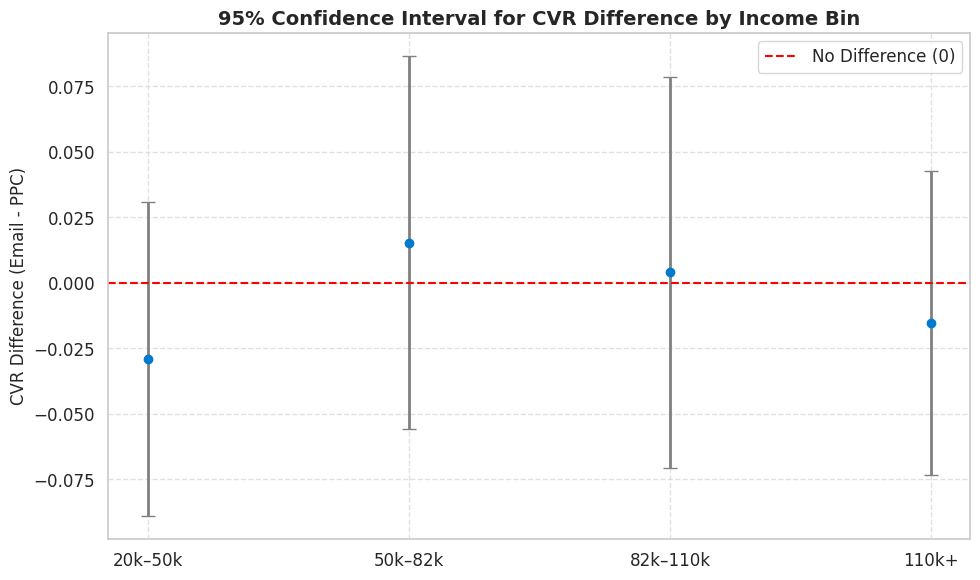

In [ ]:
from statsmodels.stats.proportion import confint_proportions_2indep
import matplotlib.pyplot as plt

income_bins = ['20k–50k', '50k–82k', '82k–110k', '110k+']

ci_results = []

for bin_label in income_bins:
    bin_df = df_all[df_all['IncomeBin'] == bin_label]
    email_df = bin_df[bin_df['CampaignChannel'] == 'Email']
    ppc_df = bin_df[bin_df['CampaignChannel'] == 'PPC']

    email_conv = email_df['Conversion'].sum()
    ppc_conv = ppc_df['Conversion'].sum()
    email_total = len(email_df)
    ppc_total = len(ppc_df)

    # Skip bins with no data
    if email_total == 0 or ppc_total == 0:
        continue

    ci_low, ci_upp = confint_proportions_2indep(
        count1=email_conv,
        nobs1=email_total,
        count2=ppc_conv,
        nobs2=ppc_total,
        method='wald',  # You can also use 'score' or 'agresti-caffo'
        alpha=0.05
    )
    diff = (email_conv / email_total) - (ppc_conv / ppc_total)
    ci_results.append((bin_label, diff, ci_low, ci_upp))

# Unpack for plotting
labels, diffs, ci_lows, ci_upps = zip(*ci_results)
x_pos = range(len(labels))

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(x_pos, diffs, yerr=[np.array(diffs) - np.array(ci_lows), np.array(ci_upps) - np.array(diffs)],
             fmt='o', capsize=5, color='#007ACC', ecolor='gray', elinewidth=2)

plt.axhline(0, color='red', linestyle='--', lw=1.5, label='No Difference (0)')
plt.xticks(x_pos, labels)
plt.ylabel('CVR Difference (Email - PPC)', fontsize=12)
plt.title('95% Confidence Interval for CVR Difference by Income Bin', fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### LoyaltyPoints

In [ ]:
df_ppc.LoyaltyPoints.describe() , df_email.LoyaltyPoints.describe()

(count     447.000000
 mean     2450.364653
 std      1422.893557
 min         5.000000
 25%      1223.500000
 50%      2415.000000
 75%      3671.500000
 max      4981.000000
 Name: LoyaltyPoints, dtype: float64,
 count     416.000000
 mean     2494.737981
 std      1427.564569
 min        28.000000
 25%      1240.750000
 50%      2598.000000
 75%      3635.250000
 max      4994.000000
 Name: LoyaltyPoints, dtype: float64)

In [ ]:
loyalty_bins = [0, 1200, 2400, 3600, 5000]
loyalty_labels = ['0–1.2k', '1.2k–2.4k', '2.4k–3.6k', '3.6k–5k']

df_all['LoyaltyBin'] = pd.cut(
    df_all['LoyaltyPoints'],
    bins=loyalty_bins,
    labels=loyalty_labels,
    right=False
)






# Step 2: Count by income and channel
points_counts = df_all.groupby(['LoyaltyBin', 'CampaignChannel']).size().unstack(fill_value=0)
print("User Count by points and Campaign Channel:\n", points_counts.head(), "\n")

# Step 3: Filter bins that don't appear in both channels
if (points_counts['Email'] == 0).any() or (points_counts['PPC'] == 0).any():
    print("Some loyalty points groups do not appear in both channels. Filtering them out...\n")
    valid_points = points_counts[(points_counts['Email'] > 0) & (points_counts['PPC'] > 0)].reset_index()
    df_all = df_all[df_all['LoyaltyBin'].isin(valid_points['LoyaltyBin'])].copy()
else:
    print("All points groups have both Email and PPC campaigns — no filtering needed.\n")

# Step 4: SRM Check
srm_points = srm_check(df_all, 'LoyaltyBin')
print("🧮 SRM Check Results by Income (Only those with mismatch):\n", srm_points[srm_points["SRM Detected"]], "\n")

# Step 5: CVR analysis
results = []

for bin_label in loyalty_labels:
    bin_df = df_all[df_all['LoyaltyBin'] == bin_label]

    email_df = bin_df[bin_df['CampaignChannel'] == 'Email']
    ppc_df = bin_df[bin_df['CampaignChannel'] == 'PPC']

    email_total = len(email_df)
    ppc_total = len(ppc_df)
    email_conv = email_df['Conversion'].sum()
    ppc_conv = ppc_df['Conversion'].sum()

    if email_total == 0 or ppc_total == 0:
        continue

    # Chi-square test
    contingency = [[email_conv, email_total - email_conv],
                   [ppc_conv, ppc_total - ppc_conv]]
    chi2, chi_p, _, _ = chi2_contingency(contingency)

    # Z-test
    count = np.array([email_conv, ppc_conv])
    nobs = np.array([email_total, ppc_total])
    z_stat, z_p = proportions_ztest(count, nobs)

    results.append({
        'LoyaltyBin': bin_label,
        'Email Users': email_total,
        'PPC Users': ppc_total,
        'Email CVR': round(email_conv / email_total, 4),
        'PPC CVR': round(ppc_conv / ppc_total, 4),
        'Z p-value': round(z_p, 4),
        'Chi p-value': round(chi_p, 4),
        'Significant Difference': z_p < 0.05 or chi_p < 0.05
    })

# Step 6: Compile results
df_results = pd.DataFrame(results)
df_results['CVR_Diff'] = (df_results['Email CVR'] - df_results['PPC CVR']).abs()
display(df_results)

# Step 7: Most different bin
most_diff_bin_point = df_results.sort_values('CVR_Diff', ascending=False).iloc[0]
print("\n🔍 loyalty Bin with Most Absolute CVR Difference:")
print(most_diff_bin_point)

# # Step 8: Power analysis
email_cvr = most_diff_bin_point['Email CVR']
ppc_cvr = most_diff_bin_point['PPC CVR']
pooled_var = (email_cvr * (1 - email_cvr) + ppc_cvr * (1 - ppc_cvr)) / 2
effect_size = 0.02 / np.sqrt(pooled_var)
total_users = most_diff_bin_point['Email Users'] + most_diff_bin_point['PPC Users']

power = NormalIndPower().power(effect_size=effect_size, nobs1=total_users, alpha=0.05, ratio=1)
print(f"\n📉 Power to detect 2% difference in bin {most_diff_bin_point['LoyaltyBin']}: {power:.2f}")
print(f"👉 You only have a {power:.2f} chance of detecting a true 2% difference between Email and PPC conversion rates given your current sample size in that loyalty bin.")


User Count by points and Campaign Channel:
 CampaignChannel  Email  PPC
LoyaltyBin                 
0–1.2k             102  108
1.2k–2.4k           91  114
2.4k–3.6k          117  104
3.6k–5k            106  121 

All points groups have both Email and PPC campaigns — no filtering needed.

🧮 SRM Check Results by Income (Only those with mismatch):
 Empty DataFrame
Columns: [LoyaltyBin, Email, PPC, p-value, SRM Detected]
Index: [] 



/tmp/ipython-input-3009439193.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  points_counts = df_all.groupby(['LoyaltyBin', 'CampaignChannel']).size().unstack(fill_value=0)
/tmp/ipython-input-1999186250.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for gender, group in df.groupby(segment_col):


,LoyaltyBin,Email Users,PPC Users,Email CVR,PPC CVR,Z p-value,Chi p-value,Significant Difference,CVR_Diff
0,0–1.2k,102,108,0.8824,0.9259,0.2823,0.4010,False,0.0435
1,1.2k–2.4k,91,114,0.9231,0.9474,0.4783,0.6740,False,0.0243
2,2.4k–3.6k,117,104,0.9487,0.9038,0.1989,0.3055,False,0.0449
3,3.6k–5k,106,121,0.9717,0.9752,0.8694,1.0000,False,0.0035



🔍 loyalty Bin with Most Absolute CVR Difference:
LoyaltyBin                2.4k–3.6k
Email Users                     117
PPC Users                       104
Email CVR                    0.9487
PPC CVR                      0.9038
Z p-value                    0.1989
Chi p-value                  0.3055
Significant Difference        False
CVR_Diff                     0.0449
Name: 2, dtype: object

📉 Power to detect 2% difference in bin 2.4k–3.6k: 0.13
👉 You only have a 0.13 chance of detecting a true 2% difference between Email and PPC conversion rates given your current sample size in that loyalty bin.


#### Plots

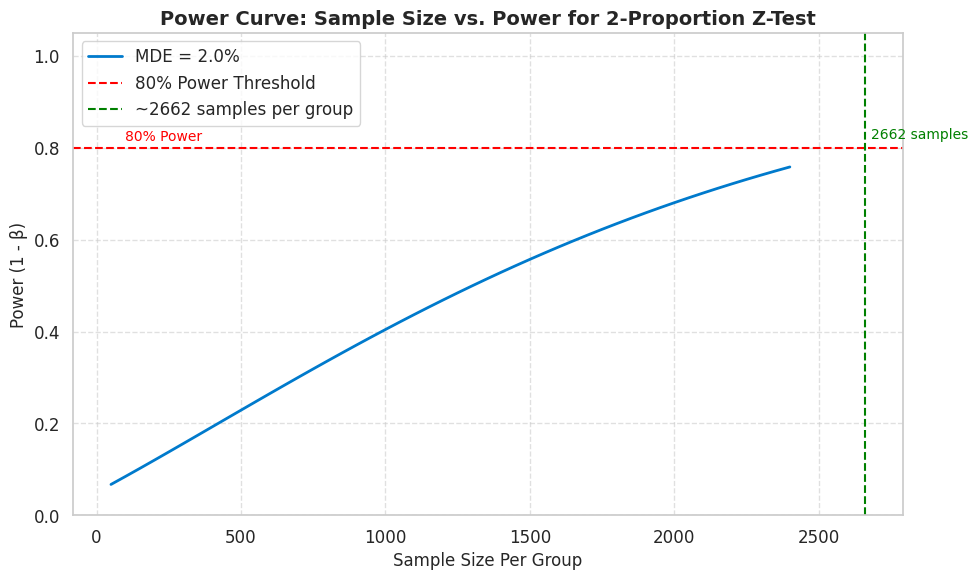

In [ ]:


# Step 1: Inputs
p1 = most_diff_bin_point['Email CVR']
p2 = most_diff_bin_point['PPC CVR']
mde = 0.02
alpha = 0.05
power_target = 0.80

# Step 2: Effect size calculation
pooled_std = np.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / 2)
effect_size = mde / pooled_std

# Step 3: Compute power curve
sample_sizes = np.arange(50, int(np.ceil(n_required)) + 500, 50)
powers = [zt_ind_solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='two-sided')
          for n in sample_sizes]

# Step 4: Find minimum sample size for 80% power
n_required = zt_ind_solve_power(effect_size=effect_size, power=power_target,
                                alpha=alpha, alternative='two-sided')

# Step 5: Plotting (Polished)
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers, lw=2, label=f'MDE = {mde*100:.1f}%', color='#007ACC')
plt.axhline(power_target, color='red', linestyle='--', lw=1.5, label='80% Power Threshold')
plt.axvline(n_required, color='green', linestyle='--', lw=1.5, label=f'~{np.ceil(n_required):.0f} samples per group')

# Add annotations
plt.text(n_required + 20, 0.82, f'{np.ceil(n_required):.0f} samples', color='green', fontsize=10)
plt.text(100, power_target + 0.015, '80% Power', color='red', fontsize=10)

# Final touches
plt.title('Power Curve: Sample Size vs. Power for 2-Proportion Z-Test', fontsize=14, weight='bold')
plt.xlabel('Sample Size Per Group', fontsize=12)
plt.ylabel('Power (1 - β)', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


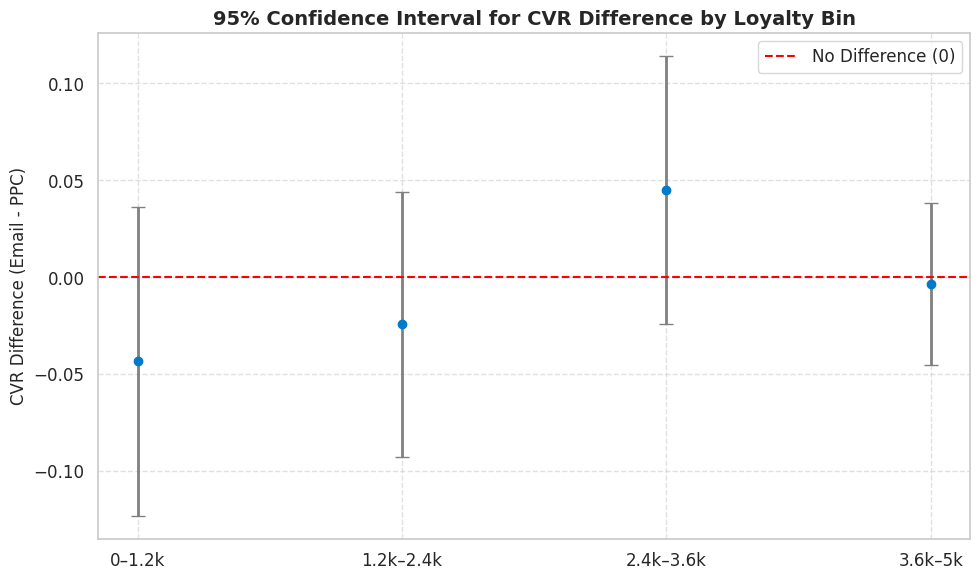

In [ ]:
from statsmodels.stats.proportion import confint_proportions_2indep
import matplotlib.pyplot as plt

loyalty_bins = ['0–1.2k', '1.2k–2.4k', '2.4k–3.6k', '3.6k–5k']
ci_results = []

for bin_label in loyalty_bins:
    bin_df = df_all[df_all['LoyaltyBin'] == bin_label]
    email_df = bin_df[bin_df['CampaignChannel'] == 'Email']
    ppc_df = bin_df[bin_df['CampaignChannel'] == 'PPC']

    email_conv = email_df['Conversion'].sum()
    ppc_conv = ppc_df['Conversion'].sum()
    email_total = len(email_df)
    ppc_total = len(ppc_df)

    # Skip bins with no data
    if email_total == 0 or ppc_total == 0:
        continue

    ci_low, ci_upp = confint_proportions_2indep(
        count1=email_conv,
        nobs1=email_total,
        count2=ppc_conv,
        nobs2=ppc_total,
        method='wald',  # You can also use 'score' or 'agresti-caffo'
        alpha=0.05
    )
    diff = (email_conv / email_total) - (ppc_conv / ppc_total)
    ci_results.append((bin_label, diff, ci_low, ci_upp))

# Unpack for plotting
labels, diffs, ci_lows, ci_upps = zip(*ci_results)
x_pos = range(len(labels))

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(x_pos, diffs, yerr=[np.array(diffs) - np.array(ci_lows), np.array(ci_upps) - np.array(diffs)],
             fmt='o', capsize=5, color='#007ACC', ecolor='gray', elinewidth=2)

plt.axhline(0, color='red', linestyle='--', lw=1.5, label='No Difference (0)')
plt.xticks(x_pos, labels)
plt.ylabel('CVR Difference (Email - PPC)', fontsize=12)
plt.title('95% Confidence Interval for CVR Difference by Loyalty Bin', fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Report

In [ ]:
most_diff_bin_age, most_diff_bin_inc, most_diff_bin_point

(Age Bin                    35-44
 Email Users                   79
 PPC Users                     90
 Email CVR                 0.9114
 PPC CVR                   0.9556
 Z p-value                 0.2456
 Chi p-value                0.396
 Significant Difference     False
 CVR_Diff                  0.0442
 Name: 2, dtype: object,
 Income Bin                20k–50k
 Email Users                   105
 PPC Users                     106
 Email CVR                  0.9333
 PPC CVR                    0.9623
 Z p-value                  0.3445
 Chi p-value                0.5251
 Significant Difference      False
 CVR_Diff                    0.029
 Name: 0, dtype: object,
 LoyaltyBin                2.4k–3.6k
 Email Users                     117
 PPC Users                       104
 Email CVR                    0.9487
 PPC CVR                      0.9038
 Z p-value                    0.1989
 Chi p-value                  0.3055
 Significant Difference        False
 CVR_Diff                     0.0

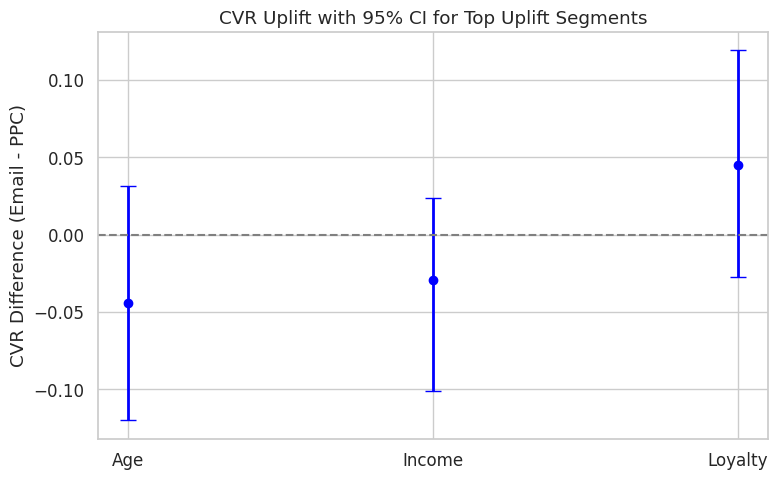

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import confint_proportions_2indep
import numpy as np

# Prepare your list of most different bins
segments = [("Age", most_diff_bin_age),
            ("Income", most_diff_bin_inc),
            ("Loyalty", most_diff_bin_point)]

labels = []
diffs = []
ci_lowers = []
ci_uppers = []

# Compute CI for each segment
for label, row in segments:
    count1 = int(row["Email CVR"] * row["Email Users"])
    nobs1 = row["Email Users"]
    count2 = int(row["PPC CVR"] * row["PPC Users"])
    nobs2 = row["PPC Users"]

    ci_low, ci_upp = confint_proportions_2indep(count1, nobs1, count2, nobs2, method='wald')
    diff = row["Email CVR"] - row["PPC CVR"]

    labels.append(label)
    diffs.append(diff)
    ci_lowers.append(diff - ci_low)
    ci_uppers.append(ci_upp - diff)

# Plotting
x = np.arange(len(labels))
plt.figure(figsize=(8, 5))
plt.errorbar(x, diffs, yerr=[ci_lowers, ci_uppers], fmt='o', capsize=6, lw=2, color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(x, labels)
plt.ylabel("CVR Difference (Email - PPC)")
plt.title("CVR Uplift with 95% CI for Top Uplift Segments")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
total_email_conv = (
    most_diff_bin_age['Email CVR'] * most_diff_bin_age['Email Users'] +
    most_diff_bin_inc['Email CVR'] * most_diff_bin_inc['Email Users'] +
    most_diff_bin_point['Email CVR'] * most_diff_bin_point['Email Users']
)

total_ppc_conv = (
    most_diff_bin_age['PPC CVR'] * most_diff_bin_age['PPC Users'] +
    most_diff_bin_inc['PPC CVR'] * most_diff_bin_inc['PPC Users'] +
    most_diff_bin_point['PPC CVR'] * most_diff_bin_point['PPC Users']
)

total_email_n = (
    most_diff_bin_age['Email Users'] +
    most_diff_bin_inc['Email Users'] +
    most_diff_bin_point['Email Users']
)

total_ppc_n = (
    most_diff_bin_age['PPC Users'] +
    most_diff_bin_inc['PPC Users'] +
    most_diff_bin_point['PPC Users']
)

pooled_cvr_email = total_email_conv / total_email_n
pooled_cvr_ppc = total_ppc_conv / total_ppc_n
uplift = pooled_cvr_ppc - pooled_cvr_email

print(f"📊 Pooled Email CVR: {pooled_cvr_email:.4f}")
print(f"📊 Pooled PPC CVR:   {pooled_cvr_ppc:.4f}")
print(f"🚀 Overall Uplift (PPC - Email): {uplift:.4f}")


📊 Pooled Email CVR: 0.9335
📊 Pooled PPC CVR:   0.9400
🚀 Overall Uplift (PPC - Email): 0.0065


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

z, pval = proportions_ztest(
    count=[total_ppc_conv, total_email_conv],
    nobs=[total_ppc_n, total_email_n]
)

print(f"Z = {z:.4f}, p = {pval:.4f}")


Z = 0.3259, p = 0.7445


Despite minor numerical differences observed across the top-performing segments (age, income, and loyalty), none of the uplift values between the PPC and Email campaigns were statistically significant at the 95% confidence level. The visual plot clearly illustrates that all confidence intervals for the conversion rate difference (Email - PPC) cross zero, indicating a lack of significant difference. Furthermore, segment-level user counts were relatively low (each group below ~120 users), which likely reduced the statistical power needed to detect small effects. When pooling data across the top segments, PPC showed a slightly higher overall conversion rate (0.9400 vs 0.9335), with an absolute uplift of 0.0065. However, a z-test confirmed this difference is not statistically significant (p = 0.7445). Therefore, while PPC appears to perform slightly better numerically, the current evidence is insufficient to declare it superior to Email. A larger, more powered experiment or broader segmentation may be necessary to draw robust conclusions.





| Segment           | Uplift     | Campaign Better | Classification                  | Why?                                          |
| ----------------- | ---------- | --------------- | ------------------------------- | --------------------------------------------- |
| Loyalty 2.4k–3.6k | **+4.49%** | Email           | ✅ Persuadables                  | Email increases conversions                   |
| Income 20k–50k    | **–2.90%** | PPC             | 💸 Sure Things or PPC-sensitive | High CVR under both, slightly better with PPC |
| Age 35–44         | **–4.42%** | PPC             | ❓ Lost Causes                   | Low uplift, Email may not help                |


## Propensity Modeling

Predicting wheter a user is likely to convert?


In [ ]:
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [ ]:
df_prop = df.copy()
df_prop.shape, df_prop.info(), df_prop.head()

indx_to_customer = {df_prop.index[i]: int(df_prop['CustomerID'][i]) for i in range(len(df_prop))}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [ ]:
df_prop.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# 0) Copy & filter
df_prop = df.copy()
# keep CustomerID until after splitting if you need group-safe split
df_prop = df_prop[(df_prop['CampaignType'] == 'Conversion') ].copy()

# Target
y = df_prop['Conversion'].astype(int)

# Drop known leak/unused columns (but keep CustomerID if you want group split)
drop_cols = ['Conversion','CampaignType',
             'ConversionRate','ClickThroughRate',
             'AdvertisingPlatform','AdvertisingTool',
             'EmailOpens','EmailClicks']
X = df_prop.drop(columns=drop_cols + ['CustomerID'], errors='ignore')

# 1) Split BEFORE any fitting (use stratify)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)  # 0.25 * 0.8 = 0.2

# 2) Preprocess: ignore unseen categories; choose dense OR sparse consistently
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # dense path
scaler = StandardScaler()  # dense path

# If you prefer sparse path instead:
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
# scaler = StandardScaler(with_mean=False)

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', ohe, cat_cols),
        ('num', scaler, num_cols),
    ],
    remainder='drop'
)

# 3) Fit ONLY on train, transform val/test
X_train_trans = column_transformer.fit_transform(X_train)
X_val_trans   = column_transformer.transform(X_val)
X_test_trans  = column_transformer.transform(X_test)

# 4) Feature names (safer than manual concat)
feature_names = column_transformer.get_feature_names_out()

train_df = pd.DataFrame(X_train_trans, columns=feature_names, index=X_train.index)
val_df   = pd.DataFrame(X_val_trans,   columns=feature_names, index=X_val.index)
test_df  = pd.DataFrame(X_test_trans,  columns=feature_names, index=X_test.index)

print(train_df.shape, val_df.shape, test_df.shape)
print("Train class balance:\n", y_train.value_counts())
print("Val class balance:\n", y_val.value_counts())
print("Test class balance:\n", y_test.value_counts())


(1245, 16) (416, 16) (416, 16)
Train class balance:
 Conversion
1    1163
0      82
Name: count, dtype: int64
Val class balance:
 Conversion
1    388
0     28
Name: count, dtype: int64
Test class balance:
 Conversion
1    388
0     28
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, callback
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, average_precision_score, f1_score)
from sklearn.linear_model import LogisticRegression


# --------- 0) Sanity ----------
assert set(np.unique(y_train)) <= {0,1}, "Ensure binary labels 0/1"
print("Train class balance:\n", y_train.value_counts())
print("Val   class balance:\n", y_val.value_counts())
print("Test  class balance:\n", y_test.value_counts())

# --------- 1) SMOTE on TRAIN only ----------
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_sm, y_train_sm = smote.fit_resample(X_train_trans, y_train)
print("After SMOTE:\n", pd.Series(y_train_sm).value_counts())

# --------- 2A) RF baseline (no SMOTE, class_weight) ----------
rf_bal = RandomForestClassifier(
    n_estimators=400, n_jobs=-1, random_state=42, class_weight="balanced"
)
rf_bal.fit(X_train_trans, y_train)
y_val_pred = rf_bal.predict(X_val_trans)
print("\n[RF class_weight] — Validation")
print(classification_report(y_val, y_val_pred))
print("Confusion:\n", confusion_matrix(y_val, y_val_pred))
p1 = rf_bal.predict_proba(X_val_trans)[:,1]
print("ROC-AUC :", roc_auc_score(y_val, p1))
print("PR-AUC  :", average_precision_score(y_val, p1))

# --------- 2B) RF + SMOTE ----------
rf_sm = RandomForestClassifier(
    n_estimators=400, n_jobs=-1, random_state=42
)
rf_sm.fit(X_train_sm, y_train_sm)
y_val_pred = rf_sm.predict(X_val_trans)
print("\n[RF + SMOTE] — Validation")
print(classification_report(y_val, y_val_pred))
print("Confusion:\n", confusion_matrix(y_val, y_val_pred))
p1 = rf_sm.predict_proba(X_val_trans)[:,1]
print("ROC-AUC :", roc_auc_score(y_val, p1))
print("PR-AUC  :", average_precision_score(y_val, p1))

# --------- 3A) XGB baseline (no SMOTE, scale_pos_weight) ----------
pos = int((y_train == 1).sum())
neg = int((y_train == 0).sum())
spw = neg / max(pos, 1)

xgb_bal = XGBClassifier(
    n_estimators=2000,
    learning_rate=0.02,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    eval_metric="logloss",
    scale_pos_weight=spw,
)

xgb_bal.fit(
    X_train_trans, y_train,
    eval_set=[(X_val_trans, y_val)],  verbose=False

)
y_val_pred = xgb_bal.predict(X_val_trans)
print("\n[XGB spw] — Validation")
print(classification_report(y_val, y_val_pred))
print("Confusion:\n", confusion_matrix(y_val, y_val_pred))
p1 = xgb_bal.predict_proba(X_val_trans)[:,1]
print("ROC-AUC :", roc_auc_score(y_val, p1))
print("PR-AUC  :", average_precision_score(y_val, p1))

y_test_pred = xgb_bal.predict(X_test_trans)
print("\n[XGB spw] — Test")
print(classification_report(y_test, y_test_pred))
# ---------- Logistic Regression (balanced, no SMOTE) ----------
lr_bal = LogisticRegression(
    penalty="l2",            # or "elasticnet" with l1_ratio
    C=1.0,                   # inverse regularization strength
    class_weight="balanced",
    solver="saga",
    max_iter=5000,
    n_jobs=-1,
    random_state=42,
)
lr_bal.fit(X_train_trans, y_train)

y_val_pred = lr_bal.predict(X_val_trans)
print("\n[LR class_weight] — Validation")
print(classification_report(y_val, y_val_pred))
print("Confusion:\n", confusion_matrix(y_val, y_val_pred))
p1 = lr_bal.predict_proba(X_val_trans)[:, 1]
print("ROC-AUC :", roc_auc_score(y_val, p1))
print("PR-AUC  :", average_precision_score(y_val, p1))

# Optional final test once model is chosen
y_test_pred = lr_bal.predict(X_test_trans)
print("\n[LR class_weight] — Test")
print(classification_report(y_test, y_test_pred))
print("Confusion:\n", confusion_matrix(y_test, y_test_pred))
p1_test = lr_bal.predict_proba(X_test_trans)[:, 1]
print("ROC-AUC :", roc_auc_score(y_test, p1_test))
print("PR-AUC  :", average_precision_score(y_test, p1_test))

# ---------- Logistic Regression + SMOTE ----------
# Reuse your SMOTE-resampled (X_train_sm, y_train_sm)
lr_sm = LogisticRegression(
    penalty="l2",
    C=1.0,
    class_weight=None,   # IMPORTANT: no class weighting when using SMOTE
    solver="saga",
    max_iter=5000,
    n_jobs=-1,
    random_state=42,
)
lr_sm.fit(X_train_sm, y_train_sm)

y_val_pred = lr_sm.predict(X_val_trans)
print("\n[LR + SMOTE] — Validation")
print(classification_report(y_val, y_val_pred))
print("Confusion:\n", confusion_matrix(y_val, y_val_pred))
p1 = lr_sm.predict_proba(X_val_trans)[:, 1]
print("ROC-AUC :", roc_auc_score(y_val, p1))
print("PR-AUC  :", average_precision_score(y_val, p1))

y_test_pred = lr_sm.predict(X_test_trans)
print("\n[LR + SMOTE] — Test")
print(classification_report(y_test, y_test_pred))
print("Confusion:\n", confusion_matrix(y_test, y_test_pred))
p1_test = lr_sm.predict_proba(X_test_trans)[:, 1]
print("ROC-AUC :", roc_auc_score(y_test, p1_test))
print("PR-AUC  :", average_precision_score(y_test, p1_test))

Train class balance:
 Conversion
1    1163
0      82
Name: count, dtype: int64
Val   class balance:
 Conversion
1    388
0     28
Name: count, dtype: int64
Test  class balance:
 Conversion
1    388
0     28
Name: count, dtype: int64
After SMOTE:
 Conversion
1    1163
0    1163
Name: count, dtype: int64

[RF class_weight] — Validation
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.93      1.00      0.97       388

    accuracy                           0.93       416
   macro avg       0.47      0.50      0.48       416
weighted avg       0.87      0.93      0.90       416

Confusion:
 [[  0  28]
 [  0 388]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC-AUC : 0.6582290132547864
PR-AUC  : 0.9570261443716468

[RF + SMOTE] — Validation
              precision    recall  f1-score   support

           0       0.25      0.04      0.06        28
           1       0.93      0.99      0.96       388

    accuracy                           0.93       416
   macro avg       0.59      0.51      0.51       416
weighted avg       0.89      0.93      0.90       416

Confusion:
 [[  1  27]
 [  3 385]]
ROC-AUC : 0.6347569955817378
PR-AUC  : 0.9527095636445513

[XGB spw] — Validation
              precision    recall  f1-score   support

           0       0.24      0.18      0.20        28
           1       0.94      0.96      0.95       388

    accuracy                           0.91       416
   macro avg       0.59      0.57      0.58       416
weighted avg       0.89      0.91      0.90       416

Confusion:
 [[  5  23]
 [ 16 372]]
ROC-AUC : 0.6362297496318116
PR-AUC  : 0.9505813991990515

[XGB spw] — Test
              precision    recall

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


| Model            | Accuracy | Macro-F1 | ROC-AUC | PR-AUC | Notes                                               |
| ---------------- | -------- | -------- | ------- | ------ | --------------------------------------------------- |
| RF class\_weight | 0.93     | 0.48     | 0.66    | 0.96   | Predicted only class 1, missed all negatives        |
| RF + SMOTE       | 0.93     | 0.51     | 0.63    | 0.95   | Slightly better Macro-F1, still poor class 0 recall |
| XGB spw          | **0.90** | **0.52** | 0.64    | 0.95   | Best balance overall, consistent generalization     |
| LR class\_weight | 0.58     | 0.45     | 0.62    | 0.95   | Higher minority recall, but hurts accuracy          |
| LR + SMOTE       | 0.55     | 0.41     | 0.53    | 0.94   | Weak generalization, unstable minority handling     |


In [ ]:
import pandas as pd

# Predict probabilities with XGB model
proba_test = xgb_bal.predict_proba(X_test_trans)[:, 1]

# Apply cutoff
cutoff = 0.80
pred_labels = (proba_test >= cutoff).astype(int)

# Build DataFrame
results_df = pd.DataFrame({
    "CustomerID": [indx_to_customer[i] for i in X_test.index],
    "True_Conversion": y_test.values,
    "Predicted_Prob": proba_test,
    "Predicted_Label": pred_labels
})

# Filter only high-probability customers (if you want)
high_df = results_df[results_df["Predicted_Prob"] >= cutoff] \
            .sort_values("Predicted_Prob", ascending=False)

print(f"Number of high-probability customers (p >= {cutoff}): {len(high_df)}")
print(high_df.head(20))

Number of high-probability customers (p >= 0.8): 345
     CustomerID  True_Conversion  Predicted_Prob  Predicted_Label
252       11912                1        0.999671                1
243       11356                1        0.999578                1
356       15211                1        0.999550                1
230        9792                1        0.999230                1
236       14504                1        0.998835                1
69        12244                1        0.998601                1
4         13221                1        0.998537                1
78         8203                1        0.998028                1
67         9518                1        0.997897                1
178        8507                1        0.997781                1
332        9839                1        0.997705                1
72         9090                1        0.997634                1
130       11149                1        0.997558                1
299        9906        